# An modeling example of determining effluent concentration on two well-mixed tanks

This example simulate the mathmatical model of two well-mixed tanks and plot the graph of the effluent concentration versus time. 
the sketch of two well-mixed tanks shows below:
<img src='Two well-mixed tank sketch.png' width = 400>
# Governing equation and its conditions
First tank governing equation:
$\frac{dC_1}{dt}=\frac{Q(C_0-C_1)}{V_1}$  
General solution of the first tank: $C_1=C_0(1-e^{-t\frac{Q}{V_1}}$  
Second tank governing equation: $\frac{dC_2}{dt}=\frac{Q(C_1-C_2)}{V_2}$   
The general solution of first tank will be plugged into the second tank gorverning equation.   
The combined equation will be solved by using integrating factor method.  
An example of how to use the integrating factor method is showing on this URL:http://www.mathcentre.ac.uk/resources/uploaded/mathcentre-ode.pdf  

The general solution of the two well-mixed tanks:  
$C_2=C_0(1-e^{-t\frac{Q}{V_2}})+\frac{V_1}{V_1-V_2}(e^{-t\frac{Q}{V_2}}-e^{-t\frac{Q}{V_1}})$  

The Parameters:  

|Parameter|Description|
|:-|:----|
|$C_{0}$|Influent concentration ($ML^{-3}$)|  
|$Q$|Steady flow rate  ($L^{3}T^{-1}$)|  
|$V_{1}$|First tank volume ($L^{3}$)|  
|$V_{2}$|Second tank volume ($L^{3}$)| 


The independent variables: $t$  
The dependent variables: $C_1$  $C_2$  
The initial condition: $C_1(t=0)=0$


The code below defines the values of the function and imports key Python libraries that are used subsequently

In [1]:
import numpy as np
from matplotlib import pyplot as plt, lines

Q=1   #steady flowrate @ L/s
C0=100   #initial concentration @ mg/L
V1=100  #first tank volume @ L
V2=200  #second tank volume @ L

time=1000


Below python code shows the calculating process of effluent concentration across the setting operating time based on four different model status.

In [2]:
t=np.arange(0,time,10)
#at first tank, the effluent concentration express below

C1=C0*(1-np.exp(-t*Q/V1))

#at second tank, the effluent concentration express below
S=V1/(V1-V2)
E1=np.exp(-t*Q/V1)
E2=np.exp(-t*Q/V2)

C2=C0*(1-E2)+S*C0*(E2-E1)

#Plug flow reactor
V=V1+V2
Tau=V/Q
xs=[0,Tau,Tau,time]
ys=[0,0,C0,C0]
#CFTR 
C=C0*(1-np.exp(-t*Q/V))

The results of each model status are showing below. 

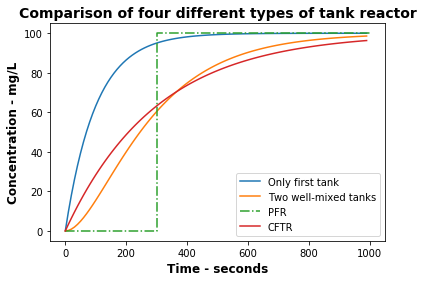

In [3]:
%matplotlib inline
plt.plot(t,C1,ls = '-',label='Only first tank')
plt.plot(t,C2,ls = '-',label='Two well-mixed tanks')
plt.plot(xs,ys,ls = '-.',label='PFR')
plt.plot(t,C,ls = '-',label='CFTR')
plt.xlabel('Time - seconds',size = 12, weight = 'bold')
plt.ylabel('Concentration - mg/L',size = 12, weight = 'bold')
plt.title('Comparison of four different types of tank reactor',size = 14, weight = 'bold')
plt.legend()
plt.show()